In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import entropy

In [3]:
df=pd.read_csv('Automobile.csv')

In [5]:
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [7]:
df.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [15]:
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")


In [19]:
# Handle missing values for categorical columns by filling with mode
df['name'] = df['name'].fillna(df['name'].mode()[0])
df['origin'] = df['origin'].fillna(df['origin'].mode()[0])

# Handle missing values for numerical columns by filling with median
df['mpg'] = df['mpg'].fillna(df['mpg'].median())
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].median())
df['displacement'] = df['displacement'].fillna(df['displacement'].median())
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())
df['weight'] = df['weight'].fillna(df['weight'].median())
df['acceleration'] = df['acceleration'].fillna(df['acceleration'].median())
df['model_year'] = df['model_year'].fillna(df['model_year'].median())


In [21]:
df = pd.get_dummies(df, drop_first=True)


In [23]:
X = df.drop(columns=["mpg"])  # Drop the target column
y = df["mpg"]  # Set 'mpg' as the target variable


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Fit the model on your training data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [47]:
# Predict the target values for the test data
y_pred = regressor.predict(X_test)


In [51]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 6.74
R² Score: 0.87


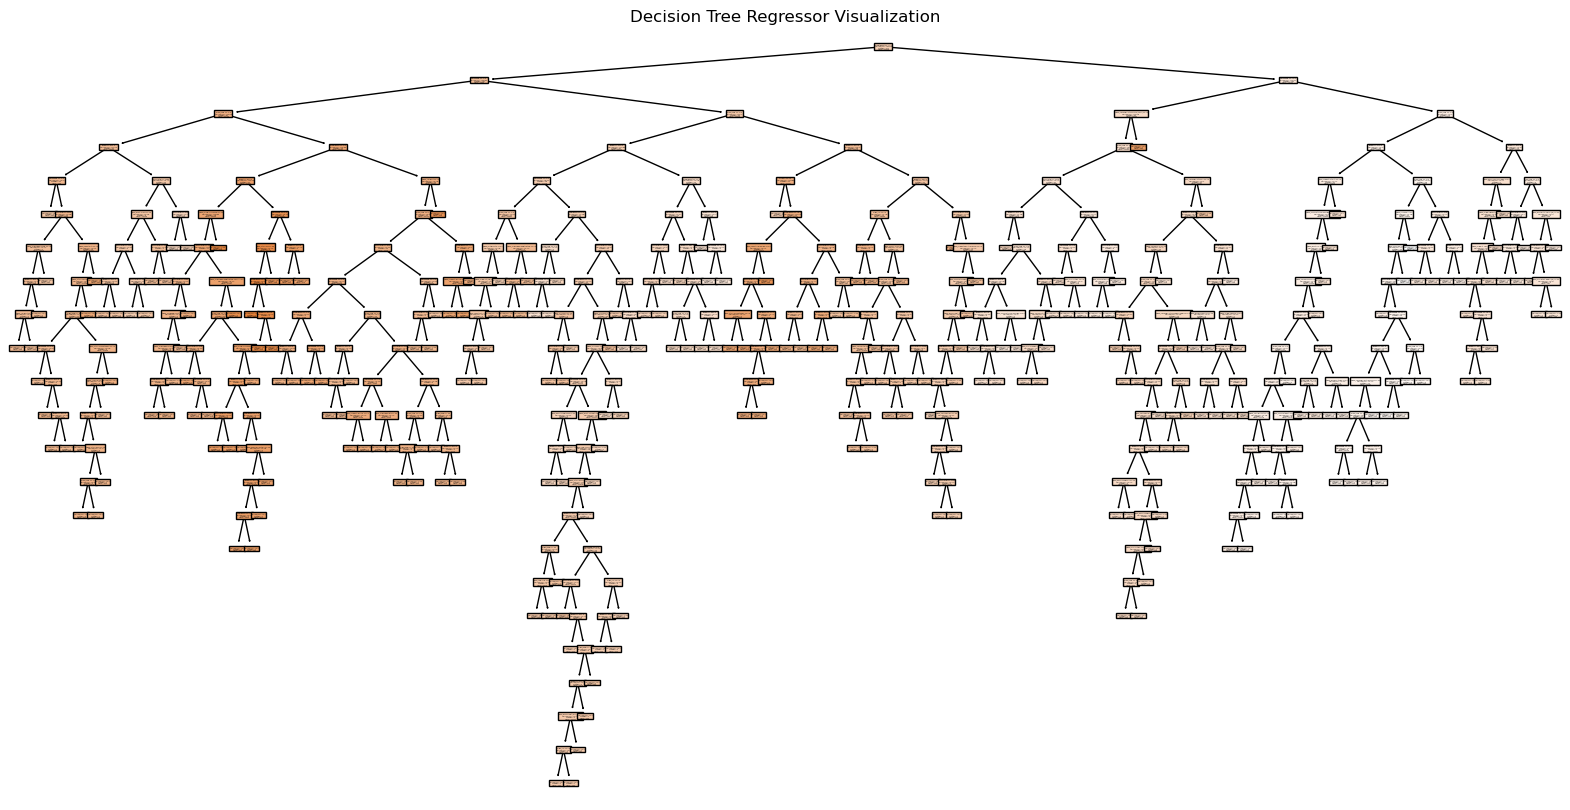

In [53]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(regressor, feature_names=X.columns, filled=True)
plt.title("Decision Tree Regressor Visualization")
plt.show()


In [55]:
def calculate_entropy_from_continuous_target(y, bins=5):
    # Discretize the continuous target into categories (e.g., 5 bins)
    y_binned = np.digitize(y, np.histogram_bin_edges(y, bins=bins))
    class_counts = np.bincount(y_binned)
    probabilities = class_counts / len(y_binned)
    return entropy(probabilities, base=2)

# Example usage:
target_entropy = calculate_entropy_from_continuous_target(df['mpg'])
print("Entropy of binned mpg:", target_entropy)

Entropy of binned mpg: 2.085656365905709
